# POKEMONS

Этот набор данных для Pokemon-ов, который включает в себя:
- Name: Название каждого покемона
- Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам
- Type 2: некоторые покемоны имеют двойной тип

 базовую статистику:
- Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон
- HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока
- Attack: базовый модификатор для обычных атак (например, Scratch, Punch)
- Defense: сопротивление базовому урону от обычных атак
- SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)
- SP Def: сопротивление базового урона от специальных атак
- Speed: определяет, какой покемон атакует первым

так же для кажого покемона указано:

- поколение (generation)
- легендарность (legendary)

In [196]:
import numpy as np
import pandas as pd
import csv as cs
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
data = pd.read_csv('Pokemon_1.csv', sep = ',', engine = 'python')

In [198]:
type(data)

pandas.core.frame.DataFrame

In [199]:
cols = list(data.columns.values)
cols

['Name',
 'Type_1',
 'Type_2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'Legendary']

In [200]:
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [201]:
data.tail()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [202]:
print(data)

                          Name    Type_1  Type_2  Total   HP  Attack  Defense  \
0                    Bulbasaur     Grass  Poison    318   45      49       49   
1                      Ivysaur     Grass  Poison    405   60      62       63   
2                     Venusaur     Grass  Poison    525   80      82       83   
3        VenusaurMega Venusaur     Grass  Poison    625   80     100      123   
4                   Charmander      Fire     NaN    309   39      52       43   
5                   Charmeleon      Fire     NaN    405   58      64       58   
6                    Charizard      Fire  Flying    534   78      84       78   
7    CharizardMega Charizard X      Fire  Dragon    634   78     130      111   
8    CharizardMega Charizard Y      Fire  Flying    634   78     104       78   
9                     Squirtle     Water     NaN    314   44      48       65   
10                   Wartortle     Water     NaN    405   59      63       80   
11                   Blastoi

In [203]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [204]:
data.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp_Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp_Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Зависимость атаки от колличества здоровья:

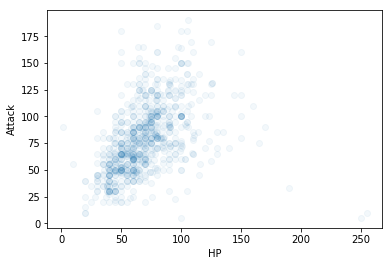

In [205]:
plt.plot(data['HP'], data['Attack'], 'o', alpha = 0.05)
plt.xlabel('HP')
plt.ylabel('Attack')
pass

Зависимость эффективности покемона от очереди его атаки:

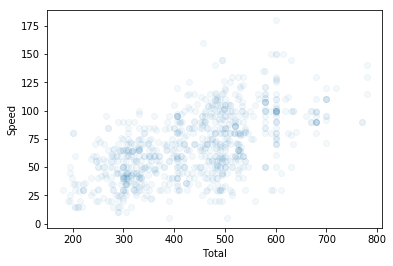

In [206]:
plt.plot(data['Total'], data['Speed'], 'o', alpha = 0.05)
plt.xlabel('Total')
plt.ylabel('Speed')
pass

Зависимость суммы всех статистических данных покемона от его уникальности:

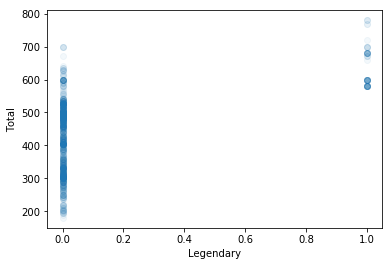

In [207]:
plt.plot(data['Legendary'], data['Total'], 'o', alpha = 0.05)
plt.xlabel('Legendary')
plt.ylabel('Total')
pass

### Описание данных:

In [208]:
data.describe(include = ['object'])

,Name,Type_1,Type_2
count,800,800,414
unique,800,18,18
top,Hitmonchan,Water,Flying
freq,1,112,97


In [209]:
data.describe(include = 'all')

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
count,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Hitmonchan,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [210]:
data[data.Type_2.isnull()]

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
24,Rattata,Normal,NaN,253,30,56,35,25,35,72,1,False
25,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False


In [211]:
data['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [212]:
data['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Уберем Type 2, так как для половины случаев он незаполнен:

In [213]:
data = data.drop('Type_2', axis=1)

А так же уберем имена:

In [214]:
data = data.drop('Name', axis=1)

In [215]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


In [216]:
data_nonbinary = pd.get_dummies(data['Type_1'])
print(data_nonbinary.columns)

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')


In [217]:
y = np.array([1 if it == True else 0 for it in data['Legendary']])

In [ ]:
data = data.drop('Legendary', axis=1)

## Нормализация количественных признаков

In [228]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [229]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [230]:
data_numerical.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


Соединяем все в одну таблицу:

In [231]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(800, 26)


In [232]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Bug,Dark,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,0.086250,0.038750,...,0.040000,0.087500,0.040000,0.030000,0.122500,0.035000,0.071250,0.055000,0.033750,0.140000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.280908,0.193119,...,0.196082,0.282743,0.196082,0.170694,0.328068,0.183895,0.257403,0.228123,0.180698,0.347204
min,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
X = data
feature_names = X.columns

In [234]:
type(feature_names)

pandas.indexes.base.Index

In [235]:
feature_names

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [236]:
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 26)
(800,)


In [237]:
type(y)

numpy.ndarray

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


## KNN

In [240]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [241]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [242]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.05 0.0708333333333


### Подбор параметров

In [243]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0482142857143 25


In [244]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0464285714286 0.0666666666667


с ошибкой 0.06 можно предсказать Легендарный покемон или нет по имебщимся признакам.